In [19]:
setwd('/import/wgcna/test')

In [26]:
dir = './'

In [27]:
samples=list.files(dir)

In [28]:
samples 

[1] "1" "2"

In [37]:



library(data.table)
sceList = lapply(samples,function(pro){ 
  # pro=samples[1] 
  print(pro) 
  sce1=CreateSeuratObject(counts =  Read10X(file.path(dir,pro) ) ,
                         project =  pro ,
                         min.cells = 5,
                         min.features = 300)

  return(sce1)
})

[1] "1"
[1] "2"


In [40]:
a = merge(sceList[[1]],sceList[[2]])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [ ]:
a

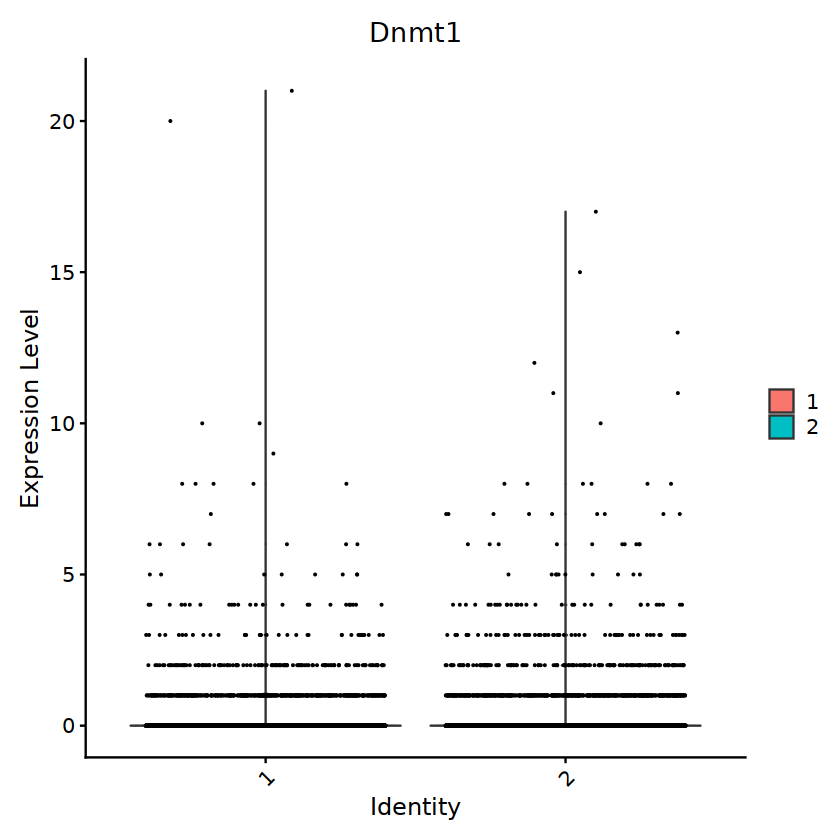

In [42]:
VlnPlot(a,features = 'Dnmt1')

In [20]:
data = Read10X('./')

In [22]:
sce = CreateSeuratObject(data)

Warning message:
"Only one identity present, the expression values will be not scaled"


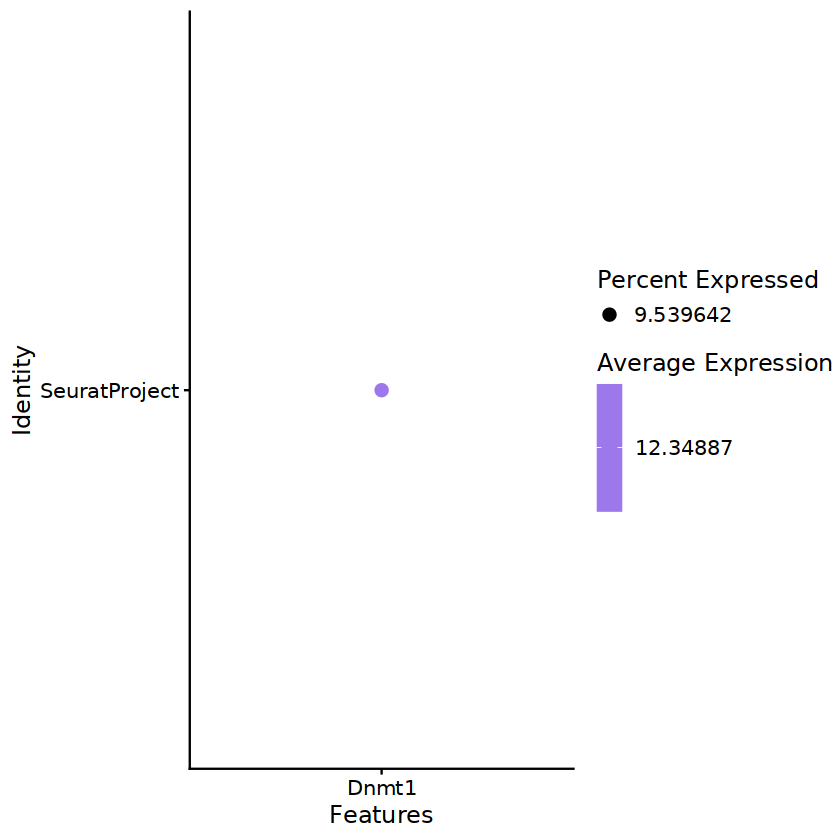

In [25]:
DotPlot(sce,features = 'Dnmt1')

In [2]:
data = read.csv('./GSE137818_scRNA_logcounts.csv', header=T, row.names = 1)

In [3]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [4]:
main_tiss <- CreateSeuratObject(counts = data)

In [5]:
main_tiss

An object of class Seurat 
12190 features across 53136 samples within 1 assay 
Active assay: RNA (12190 features, 0 variable features)

In [7]:
library(dplyr)
library(tidyr)
library(stringr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"


In [8]:
main_tiss@meta.data$barcode = rownames(main_tiss@meta.data)

In [10]:
b = str_split_fixed(main_tiss@meta.data$barcode, "_", 2)

In [11]:
main_tiss@meta.data = cbind(main_tiss@meta.data,b)

In [12]:
head(main_tiss@meta.data,2)

,orig.ident,nCount_RNA,nFeature_RNA,barcode,1,2
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACCTGAGACTTTCG.1_17QQ2,SeuratProject,2752.962,1568,AAACCTGAGACTTTCG.1_17QQ2,AAACCTGAGACTTTCG.1,17QQ2
AAACCTGCACCGAAAG.1_17QQ2,SeuratProject,2478.170,1290,AAACCTGCACCGAAAG.1_17QQ2,AAACCTGCACCGAAAG.1,17QQ2


In [16]:
DefaultAssay(main_tiss) = 'RNA'

In [17]:
Idents(main_tiss) = '2'

In [18]:
VlnPlot(main_tiss,features = c('BRCA1','BRCA2'))

ERROR: Error in FetchData.Seurat(object = object, vars = features, slot = slot): None of the requested variables were found: BRCA1, BRCA2
